# Benchmarcks and plots of various SVM RL envs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
## All the data stored in the hdf5 file
f = h5py.File('run_12.hdf5', 'r')

list(f.keys())

OSError: Unable to open file (unable to open file: name = 'run_12.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [14]:
## Read file and print its info and hyperparams
for k in f['info'].attrs.keys():
    print(k, ' : ', f['info'].attrs[k])

for k in f['hyperparams'].attrs.keys():
    print(k, ' : ', f['hyperparams'].attrs[k])

alg  :  DDPG
env  :  svmEnv-v2
add_noise_every  :  1
batch_size  :  1
bootstrap_size  :  1
gamma  :  1.0
lr_actor  :  0.0001
lr_critic  :  0.0001
num_update  :  1
tau  :  0.001
transfer_every  :  1
update_every  :  1


In [15]:
## Example of data stored and number of episodes
# print(list(f['rewards'].keys()))

print('The number of episodes is then:', len(f['rewards'].keys()))

The number of episodes is then: 10


The max score is at episode 1 and is equal to 59.67163848876953
The min score is at episode 5 and is equal to 35.161720275878906


Text(0.5, 0, 'Episode #')

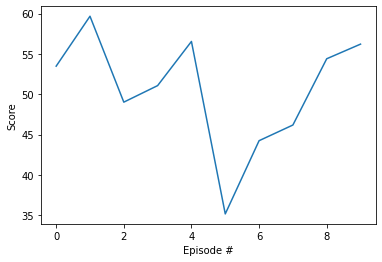

In [16]:
## Score data analysis

scores = np.zeros(len(f['rewards'].keys()))
for i in range(len(f['rewards'].keys())):
    scores[i] = np.sum(f['rewards'][f'rew_ep_{i}'][:])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')

This episode collected a score of =  59.67164


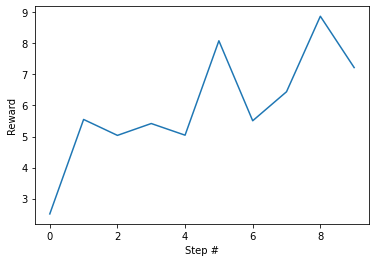

In [17]:
## Rewards of episode with max score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_max}'])), f['rewards'][f'rew_ep_{index_max}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_max}'][:]))

The last energy reached is =  -0.110425


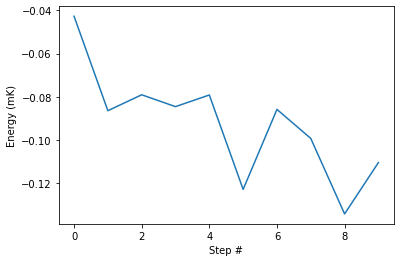

In [18]:
## Plot energies of episode with max score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_max}'])), f['energies'][f'en_ep_{index_max}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_max}'][-1])

The last princip dim reached is =  48


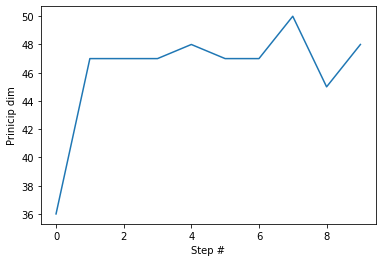

In [19]:
## Plot princip dim of episode with max score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_max}'])), f['princip_dims'][f'pri_dim_ep_{index_max}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_max}'][-1])

(array([[0., 0., 0., 2., 2., 1., 0., 0., 1., 4.],
        [4., 5., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 2., 2., 1., 1., 0., 0., 1., 1.]]),
 array([0.01405198, 0.11974739, 0.2254428 , 0.3311382 , 0.43683362,
        0.54252905, 0.6482244 , 0.75391984, 0.85961527, 0.96531063,
        1.0710061 ], dtype=float32),
 <a list of 3 BarContainer objects>)

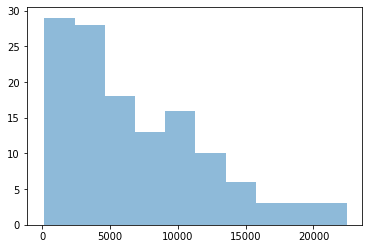

In [20]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_max}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

This episode collected a score of =  35.16172


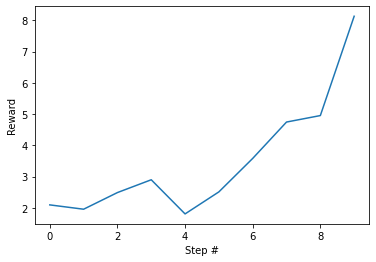

In [21]:
## Plot rewards of episode with min score

plt.plot(np.arange(len(f['rewards'][f'rew_ep_{index_min}'])), f['rewards'][f'rew_ep_{index_min}'][:])
plt.ylabel('Reward')
plt.xlabel('Step #')

print('This episode collected a score of = ', np.sum(f['rewards'][f'rew_ep_{index_min}'][:]))

The last energy reached is =  -0.123502


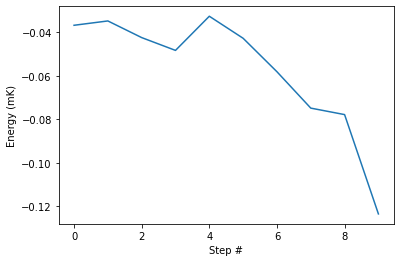

In [22]:
## Plot energies of episode with min score

plt.plot(np.arange(len(f['energies'][f'en_ep_{index_min}'])), f['energies'][f'en_ep_{index_min}'][:])
plt.ylabel('Energy (mK)')
plt.xlabel('Step #')

print('The last energy reached is = ',f['energies'][f'en_ep_{index_min}'][-1])

The last princip dim reached is =  50


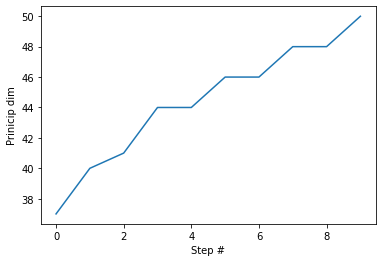

In [23]:
## Plot princip dim of episode with min score

plt.plot(np.arange(len(f['princip_dims'][f'pri_dim_ep_{index_min}'])), f['princip_dims'][f'pri_dim_ep_{index_min}'][:])
plt.ylabel('Prinicip dim')
plt.xlabel('Step #')

print('The last princip dim reached is = ', f['princip_dims'][f'pri_dim_ep_{index_min}'][-1])

(array([[2., 5., 2., 0., 0., 1., 0., 0., 0., 0.],
        [0., 2., 1., 3., 1., 0., 3., 0., 0., 0.],
        [1., 0., 3., 2., 1., 1., 0., 0., 1., 1.]]),
 array([0.00412417, 0.08793505, 0.17174593, 0.2555568 , 0.3393677 ,
        0.42317855, 0.5069894 , 0.5908003 , 0.6746112 , 0.7584221 ,
        0.84223294], dtype=float32),
 <a list of 3 BarContainer objects>)

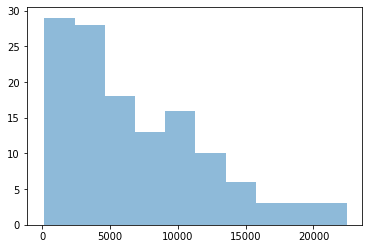

In [24]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)

sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

sigmas_rl = f['sigmas'][f'sigmas_ep_{index_min}'][:]
sigmas_rl_squared = sigmas_rl[:,0]**2 + sigmas_rl[:,1]**2 + sigmas_rl[:,2]**2

plt.hist(sigmas_random_squared, bins=10, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=10, alpha=0.5)

# Test pickle output

In [8]:
import pickle
import os

In [12]:
scores = pickle.load(open('scores.p', 'rb'))
scores

[-63.80274387348461,
 -56.42866533259555,
 -48.53313573665774,
 -66.4952664287526,
 -67.32855721439486,
 -54.88979270648578,
 -69.04190032441556,
 -39.21454208358848,
 -46.64385484601813,
 -46.712924174501026]

In [10]:
os.remove('scores.p')